# Example1 - Getting started

This example is intended to show the basic usage of the package, and how to run a simple analysis with it, the example is taken from **[C81](#ref-1)** and represents a 5 story shear-type building.

To access the data and the exact results of the system we can call the ```example_data()``` function under the submodule ```functions.gen```, which will return a tuple where the first output is an array representing the acceleration time histories of the system (subject to white noise excitation), and the second output is a tuple containing the exact result in terms of modal parameters (natural frequencies, mode shapes and damping ratios) obtained from the modal analysis of the system.

In [2]:
import os
import sys
import numpy as np
# Add the directory we execute the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

# import the function to generate the example dataset
from pyoma2.functions.gen import example_data

# generate example data and results
data, U, ground_truth = example_data()

# Print the exact results
np.set_printoptions(precision=3)
print(f"the natural frequencies are: {ground_truth[0]} \n")
print(f"the damping is: {ground_truth[1]} \n")
print("the (column-wise) mode shape matrix: \n"
f"{ground_truth[2]} \n")

the natural frequencies are: [0.89  2.598 4.095 5.261 6.   ] 

the damping is: 0.02 

the (column-wise) mode shape matrix: 
[[-0.117  0.108  0.09   0.064  0.033]
 [-0.108  0.033 -0.064 -0.117 -0.09 ]
 [-0.09  -0.064 -0.108  0.033  0.117]
 [-0.064 -0.117  0.033  0.09  -0.108]
 [-0.033 -0.09   0.117 -0.108  0.064]] 



Now we can instantiate the ```SingleSetup``` class, passing the dataset and the sampling frequency as arguments

In [9]:
from pyoma2.setup.single import SingleSetup

simp_5dof = SingleSetup(data, fs=100)

Since the maximum frequency is at approximately 6Hz, we can decimate the signal quite a bit. To do this we can call the ```decimate_data()``` method

In [4]:
# Decimate the data
simp_5dof.decimate_data(q=4)

To analise the data we need to instantiate the desired algorithm to use with a name and the required arguments.

In [12]:
from pyoma2.algorithms.fdd import FDD
from pyoma2.algorithms.ssi import SSI

# Initialise the algorithms
fdd = FDD(name="FDD", nxseg=2**11, method_SD="per")
ssidat = SSI(name="SSIdat", method="dat", br=20, ordmax=50)

# Add algorithms to the class
simp_5dof.add_algorithms(fdd, ssidat)

# run
simp_5dof.run_all()

2025-06-04 11:57:20,473 - pyoma2.setup.base - INFO - Running FDD... (base:123)
2025-06-04 11:57:20,550 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
2025-06-04 11:57:20,551 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:88)
2025-06-04 11:57:20,681 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:460)
100%|██████████| 51/51 [00:00<00:00, 35026.94it/s]
2025-06-04 11:57:20,684 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:626)
100%|██████████| 51/51 [00:00<00:00, 3393.67it/s]
2025-06-04 11:57:20,779 - pyoma2.setup.base - INFO - all done (base:102)


We can now check the results

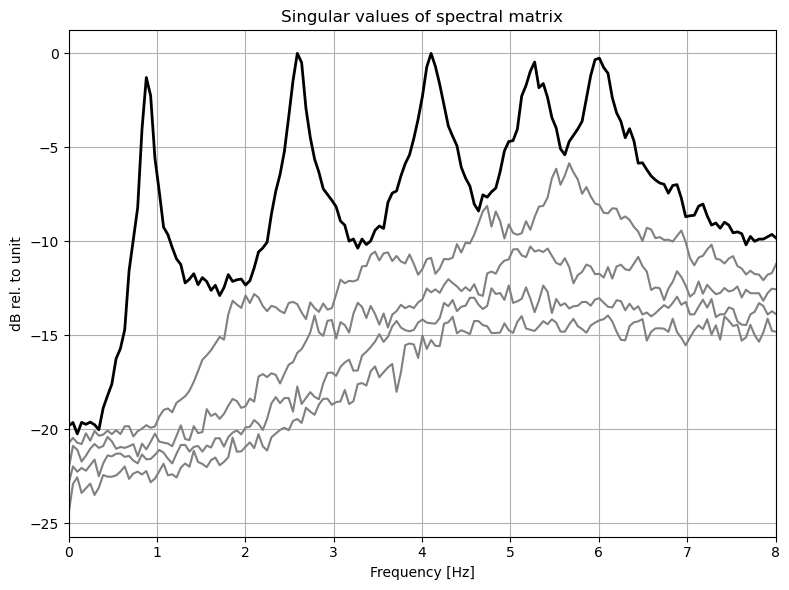

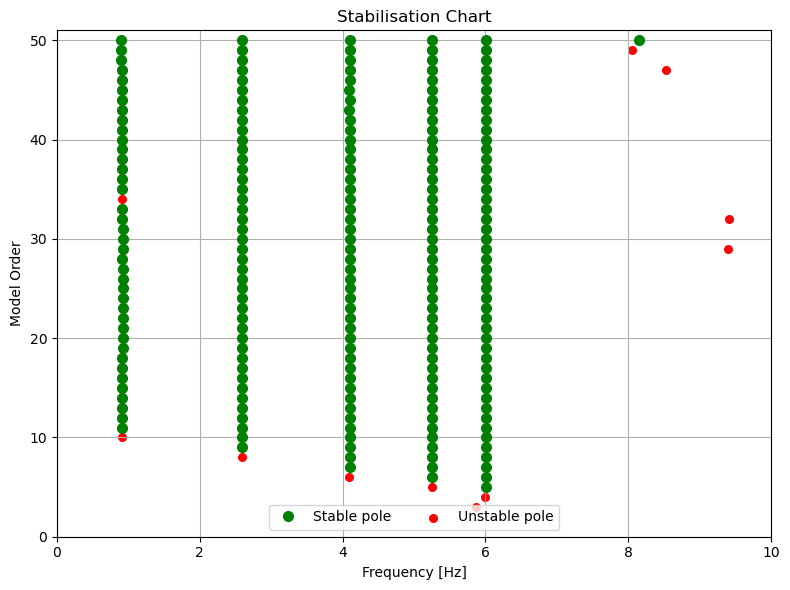

In [13]:
# plot singular values of the spectral density matrix
_, _ = fdd.plot_CMIF(freqlim=(0,8))

# plot the stabilisation diagram
_, _ = ssidat.plot_stab(freqlim=(0,10),hide_poles=False)

We can get the modal parameters with the help of an interactive plot calling the ```mpe_from_plot()``` method, or we can get the results "manually" with the ```mpe()``` method.

In [14]:
# get the modal parameters with the interactive plot
# simp_ex.mpe_from_plot("SSIdat", freqlim=(0,10))

# or manually
simp_5dof.mpe("SSIdat", sel_freq=[0.89, 2.598, 4.095, 5.261, 6.], order_in="find_min")

2025-06-04 11:57:53,439 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
2025-06-04 11:57:53,441 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1034)


Now we can access all the results and compare them to the exact values.

order out: 11 

the natural frequencies are: [0.914 2.592 4.096 5.255 6.011] 

the dampings are: [0.025 0.018 0.019 0.022 0.021] 

the (column-wise) mode shape matrix:
[[ 1.    -0.916  0.777 -0.538  0.277]
 [ 0.906 -0.278 -0.541  1.    -0.759]
 [ 0.753  0.551 -0.916 -0.292  1.   ]
 [ 0.547  1.     0.295 -0.761 -0.915]
 [ 0.283  0.761  1.     0.926  0.553]] 



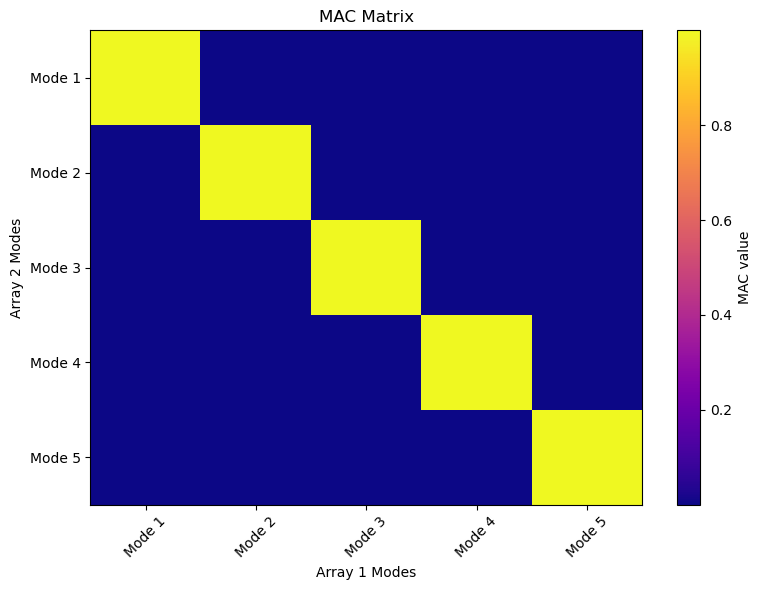

In [16]:
# dict of results
ssidat_res = dict(ssidat.result)

from pyoma2.functions.plot import plot_mac_matrix

# print the results
print(f"order out: {ssidat_res['order_out']} \n")
print(f"the natural frequencies are: {ssidat_res['Fn']} \n")
print(f"the dampings are: {ssidat_res['Xi']} \n")
print("the (column-wise) mode shape matrix:")
print(f"{ssidat_res['Phi'].real} \n")
_, _ = plot_mac_matrix(ssidat_res['Phi'].real, ground_truth[2])

## References
<a id="ref-1"></a>[C81] Chopra, Anil K. (1981). Dynamics of structures. Pearson Prentice Hall.
